# Visualization

In [738]:
from utils.TimeTransformer import TimeTransformer 
from utils.DayofWeekMonth import DayofWeekMonth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [739]:
RAW_DATA_PATH = "../data/raw/KSI.csv"
df = pd.read_csv(RAW_DATA_PATH)

In [740]:
categorical_index = df.dtypes[df.dtypes == 'object'].index
numeric_index = [x for x in df.columns if x not in categorical_index]
binary_index = [i for i in categorical_index if df[i].nunique() == 1]

In [741]:
df[binary_index] = df[binary_index].apply(lambda x: (x=='Yes'))
df[binary_index] = df[binary_index] *1


In [742]:
df['TIME'] = TimeTransformer().transform(df['TIME'])

In [743]:
df[['DAY','MONTH']] = DayofWeekMonth().transform(df['DATE'])

In [744]:
df[['DATE','DAY','MONTH']].head(5)

,DATE,DAY,MONTH
0,2006/01/01 05:00:00+00,6,1
1,2006/01/01 05:00:00+00,6,1
2,2006/06/25 04:00:00+00,6,6
3,2006/01/01 05:00:00+00,6,1
4,2006/01/01 05:00:00+00,6,1


## Number of fatal cases
ACCLASS: Classification of Accident
1. The number of fatal cases is much more than non-fatal cases, so the dataset is imbalanced

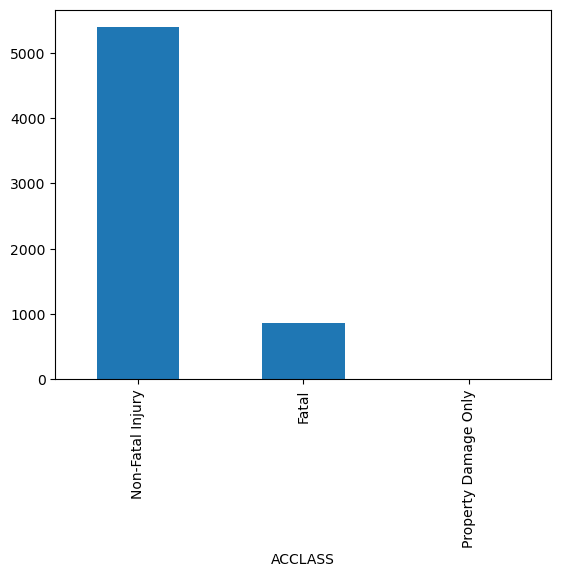

In [745]:
df.groupby(by=['ACCLASS'])['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()

## Case distribution

LATITUDE: Latitude\
LONGITUDE: Longitude\
District: City District\
ROAD_CLASS: Road Classification\
LOCCOORD: Location Coordinate

1. More cases found in downtown Toronto
2. DISTRICT: 1/3 of the cases occurs in Toronto and east york area
3. ROAD_CLASS: Most accidents occurs at 'Major Arterial'
4. LOCCOORD: Most accidents occurs at 'Intersection'

In [746]:
df.groupby(['LONGITUDE','LATITUDE','ACCNUM','ACCLASS']).size()

LONGITUDE   LATITUDE   ACCNUM      ACCLASS         
-79.638390  43.749045  1059416     Non-Fatal Injury    4
-79.634670  43.751242  5001432053  Non-Fatal Injury    2
-79.634190  43.747445  928810      Non-Fatal Injury    1
-79.634021  43.751216  4001678969  Non-Fatal Injury    1
-79.633502  43.751265  6000091975  Non-Fatal Injury    2
                                                      ..
-79.136089  43.788745  1281322     Non-Fatal Injury    1
-79.132990  43.799345  1129232     Non-Fatal Injury    2
-79.131595  43.780631  8001845570  Non-Fatal Injury    2
-79.125896  43.790312  6000168422  Non-Fatal Injury    2
-79.122974  43.788428  1000874624  Non-Fatal Injury    2
Length: 6260, dtype: int64

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

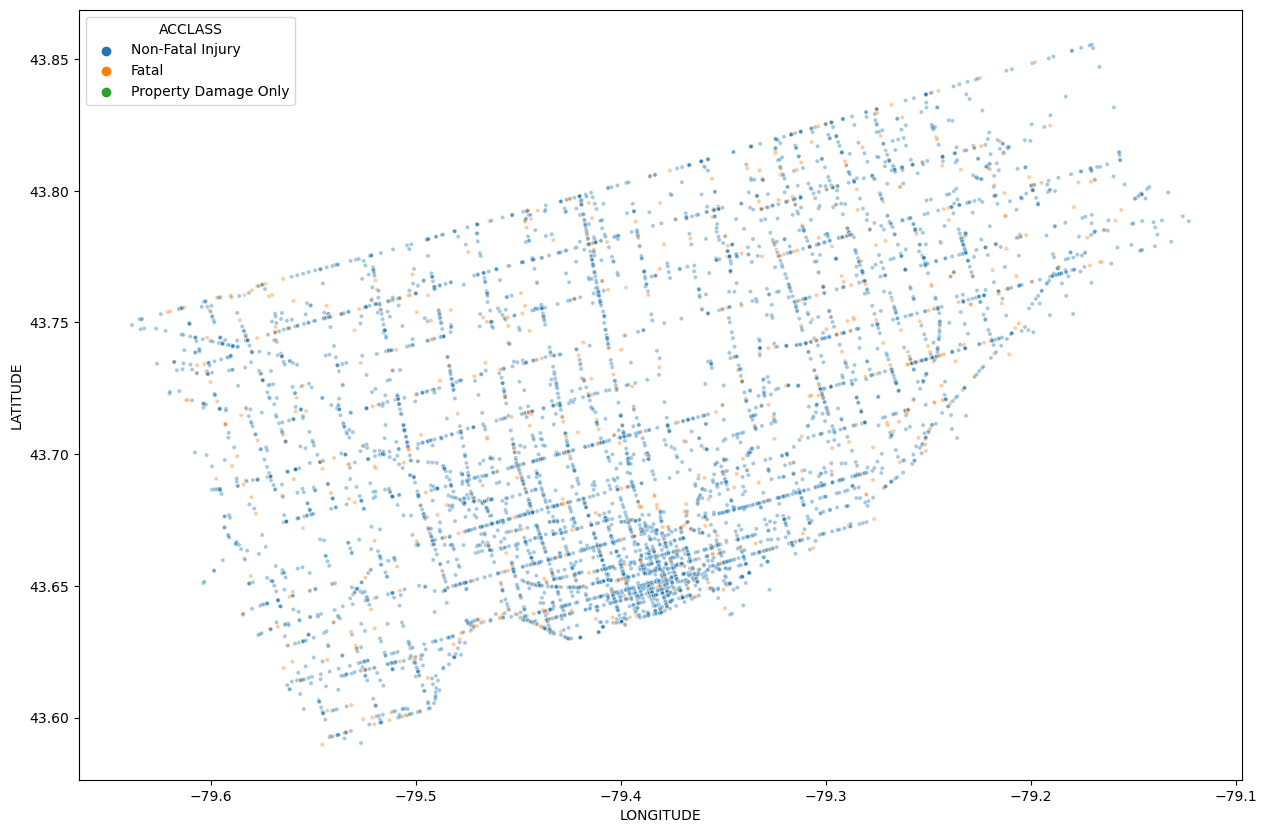

In [747]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df.groupby(['LONGITUDE','LATITUDE','ACCNUM','ACCLASS']).size(), x="LONGITUDE", y="LATITUDE", hue='ACCLASS', alpha=0.4, marker="." )

In [748]:
df_district = df.groupby('DISTRICT')['ACCNUM'].nunique().sort_values(ascending=False)
df_district

DISTRICT
Toronto and East York    2169
Etobicoke York           1452
Scarborough              1388
North York               1238
Name: ACCNUM, dtype: int64

([<matplotlib.patches.Wedge at 0x1ebe0240b20>,
 [Text(0.5079712006837206, 0.9756870703642329, 'Toronto and East York'),
  Text(-1.071077245974159, 0.2505863786330194, 'Etobicoke York'),
  Text(-0.400231756390933, -1.024604577959824, 'Scarborough'),
  Text(0.8936107633004446, -0.6414513260673773, 'North York')],
 [Text(0.2770752003729385, 0.5321929474713997, '35%'),
  Text(-0.5842239523495413, 0.1366834792543742, '23%'),
  Text(-0.2183082307586907, -0.5588752243417221, '22%'),
  Text(0.48742405270933337, -0.3498825414912967, '20%')])

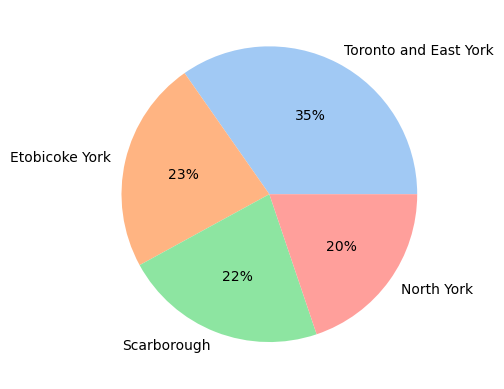

In [749]:
plt.pie(df_district, labels = df_district.index , colors = sns.color_palette('pastel')[0:len(df_district.index)], autopct='%.0f%%')

<AxesSubplot:title={'center':'Number of cases per ROAD_CLASS'}, xlabel='ROAD_CLASS'>

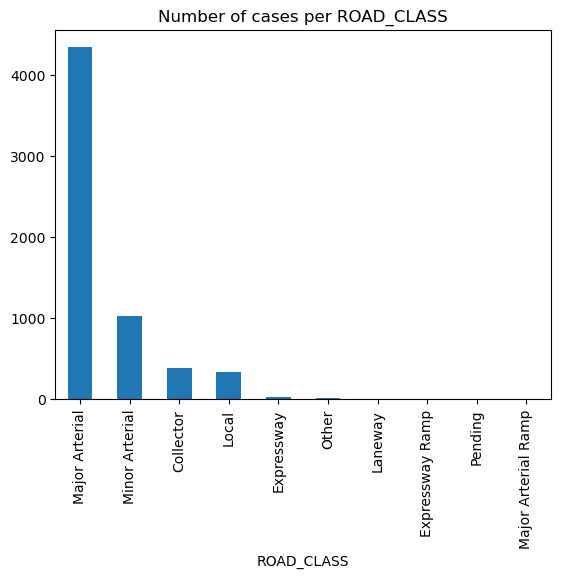

In [750]:
df.groupby('ROAD_CLASS')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar', title='Number of cases per ROAD_CLASS')


<AxesSubplot:title={'center':'Number of cases per LOCCOORD'}, xlabel='LOCCOORD'>

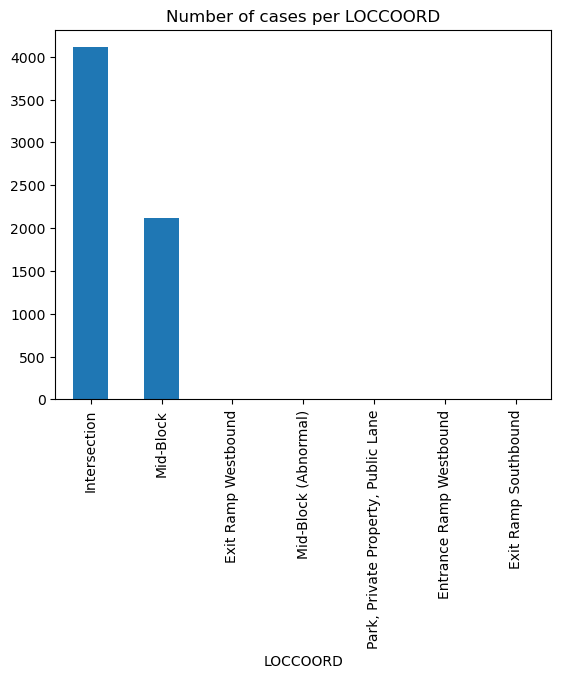

In [751]:
df.groupby('LOCCOORD')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar', title='Number of cases per LOCCOORD')

## Environment information
1. TRAFFCTL: Traffic Control Type (Marjority are 'No Control' and 'Traffic Signal')
2. VISIBILITY: Environment Condition (Marjority is 'Clear')
3. LIGHT: Light Condition (Marjority is 'Daylight')
4. RDSFCOND: Road Surface Condition (Marjority is 'Dry')


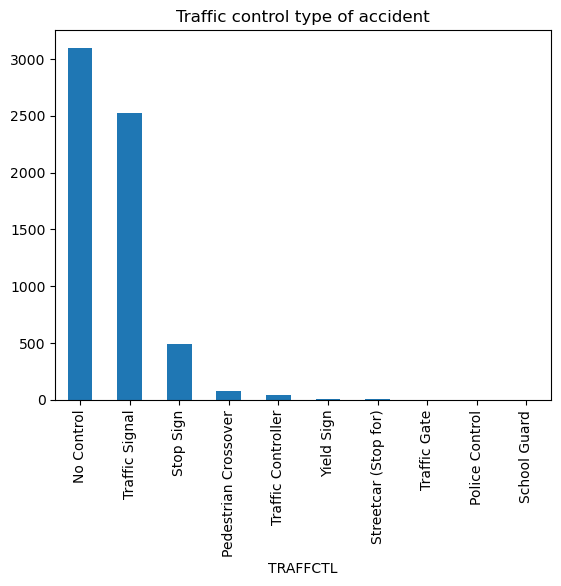

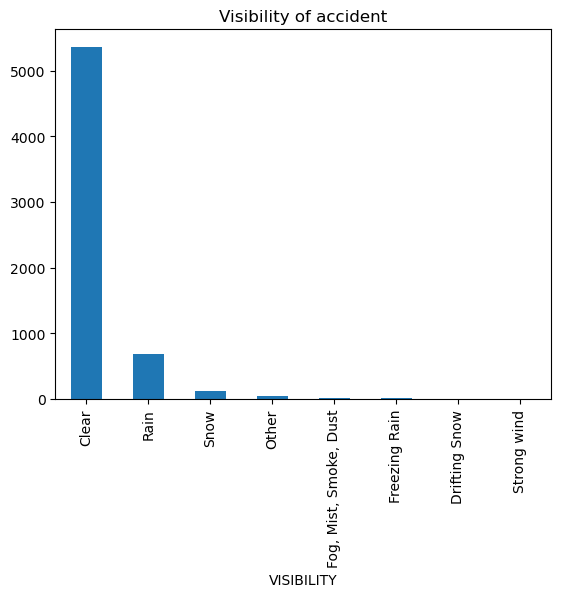

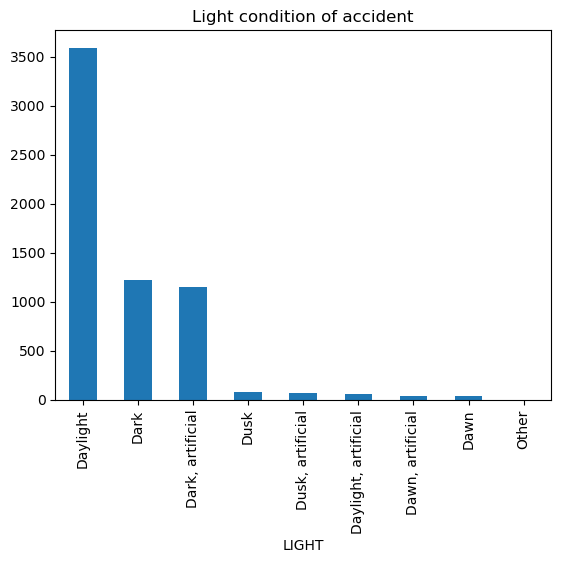

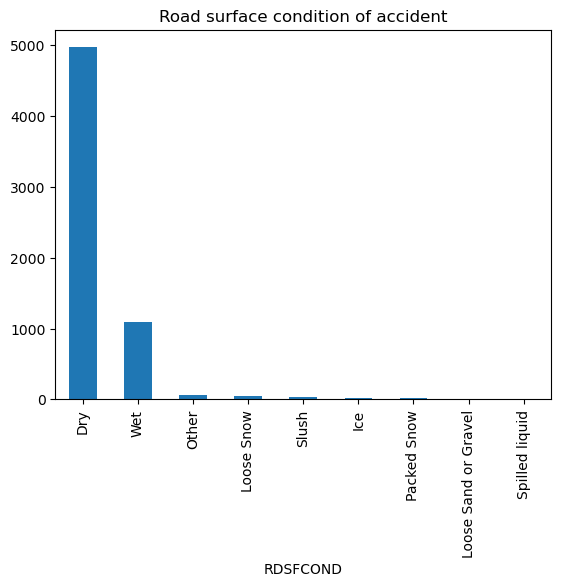

In [752]:
df.groupby('TRAFFCTL')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar', title='Traffic control type of accident')
plt.show()
df.groupby('VISIBILITY')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar', title='Visibility of accident')
plt.show()
df.groupby('LIGHT')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar', title='Light condition of accident')
plt.show()
df.groupby('RDSFCOND')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar', title='Road surface condition of accident')
plt.show()


## Incident Time
YEAR: Year Collision Occurred\
DATE: Date Collision Occurred\
TIME: Time Collision Occurred

1. The number of incidents decreases with year
2. There are less incidents in January, Febrary, March and April
3. There are more incidents on Friday (4) and less incidents on Sunday(6)
4. The number of incidents increase after 6 a.m and peaks at 6 p.m

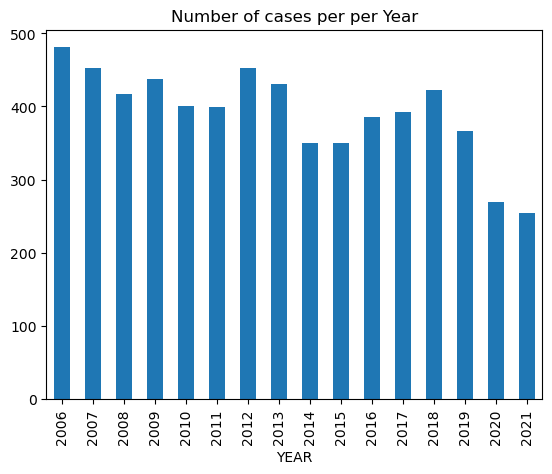

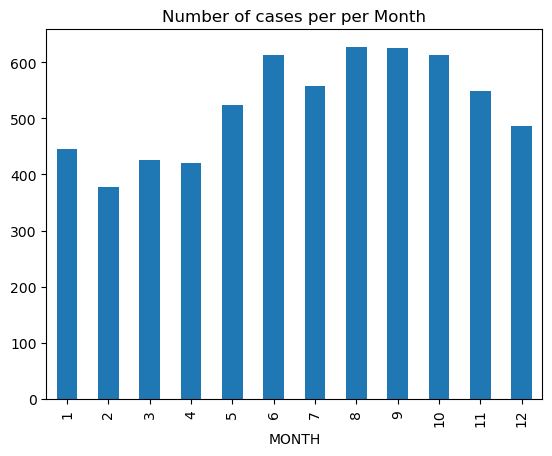

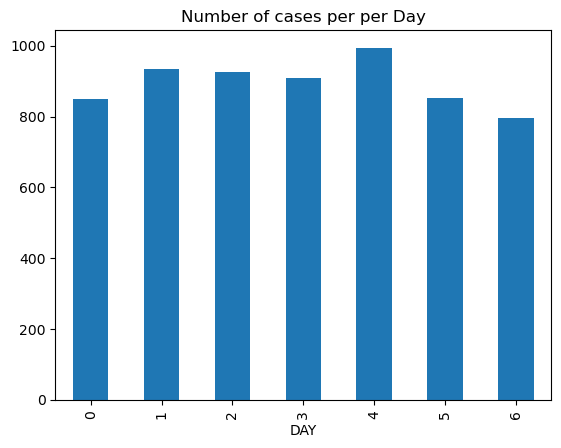

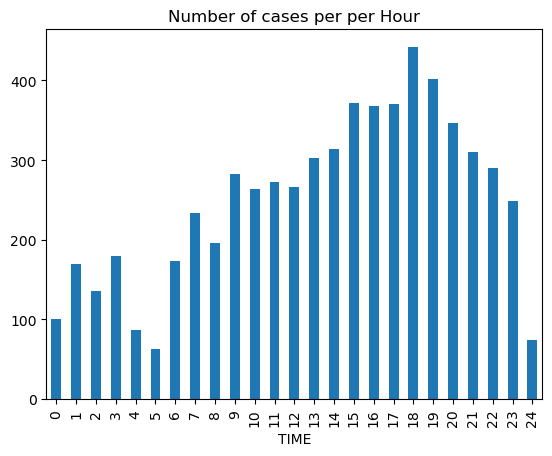

In [753]:
df.groupby(by=['YEAR'])['ACCNUM'].nunique().plot(kind='bar',title='Number of cases per Year')
plt.show()
df.groupby(by=['MONTH'])['ACCNUM'].nunique().plot(kind='bar',title='Number of cases per Month')
plt.show()
df.groupby(by=['DAY'])['ACCNUM'].nunique().plot(kind='bar',title='Number of cases per Day')
plt.show()
df.groupby(by=['TIME'])['ACCNUM'].nunique().plot(kind='bar', title='Number of cases per Hour')
plt.show()

## Accident Information
1. IMPACTYPE: Initial Impact Type (Top Initial Imact Type is Pesdestrain)
2. INVAGE: Age of Involved Party (Many age values are missing. Dealth rate increase with age)
3. VEHTYPE: Type of Vehicle (Majority of the cases involve Automobile)
4. INVTYPE: Involvement Type (Most accidents involves driver, pedestrian and passenger)



In [754]:
df['INVAGE'] =df['INVAGE'].apply(lambda x: x.replace(' to ', '-').replace('5-9','05-09')) 

<AxesSubplot:title={'center':'Initial impact type of accident'}, xlabel='IMPACTYPE'>

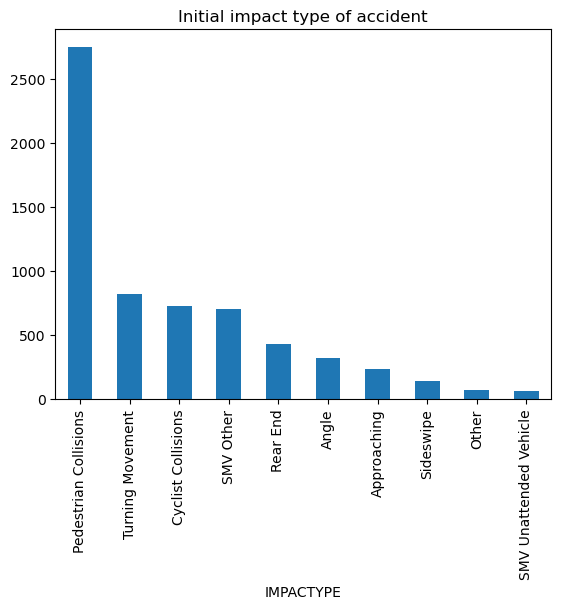

In [755]:
df.groupby(by=['IMPACTYPE'])['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar', title='Initial impact type of accident')

In [756]:
df_invage = df.pivot_table(index='INVAGE',columns='ACCLASS',values='ACCNUM',aggfunc='count').fillna(0).assign(FatalRate=lambda x:(x['Fatal']/(x['Fatal']+x['Non-Fatal Injury']+x['Property Damage Only']))*100)

<AxesSubplot:title={'center':'Age group'}, xlabel='INVAGE'>

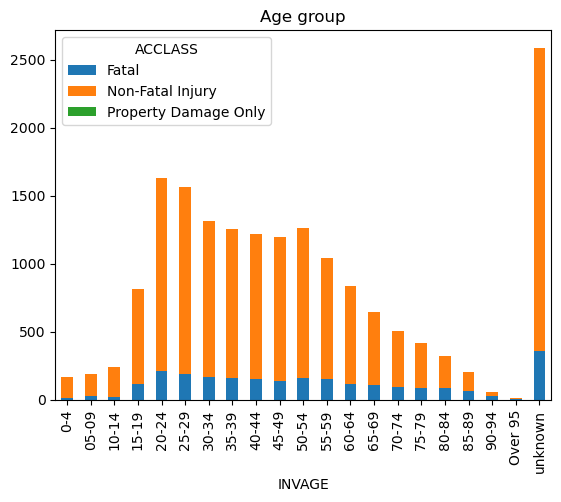

In [757]:
df_invage[['Fatal','Non-Fatal Injury','Property Damage Only']].plot(kind='bar', stacked=True, title='Age group')

<AxesSubplot:title={'center':'Death rate per age group'}, xlabel='INVAGE'>

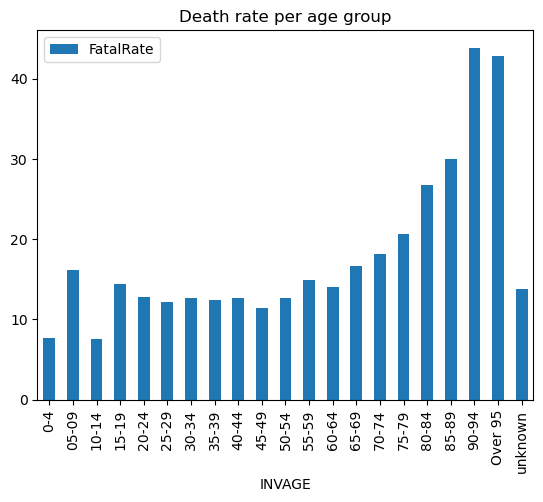

In [758]:
df_invage.plot(kind='bar',y='FatalRate', title = 'Death rate per age group')

Text(0.5, 1.0, 'Vehicle type of a person')

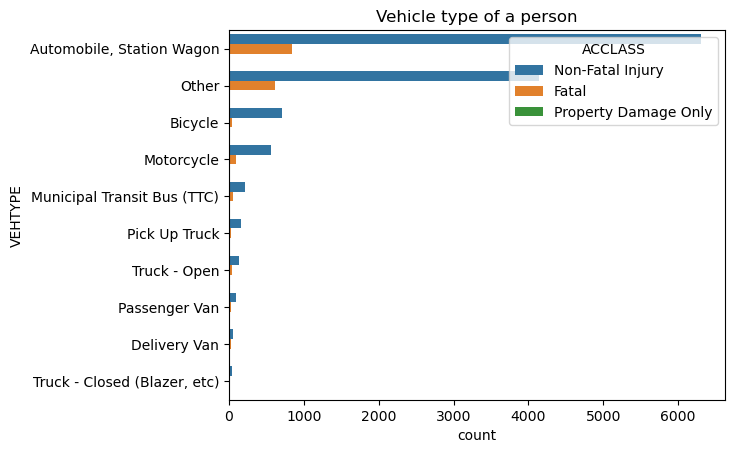

In [759]:
sns.countplot(data=df, y='VEHTYPE', hue='ACCLASS',  order=df['VEHTYPE'].value_counts().iloc[:10].index).set_title('Vehicle type of a person')

Text(0.5, 1.0, 'Road user type')

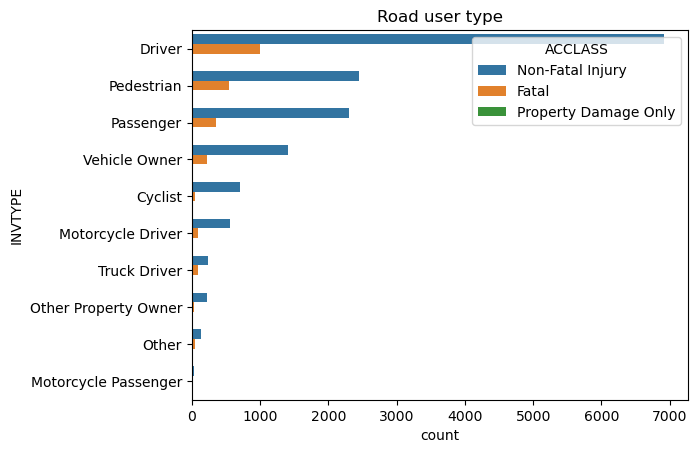

In [760]:
sns.countplot(data=df, y='INVTYPE', hue='ACCLASS',  order=df['INVTYPE'].value_counts().iloc[:10].index).set_title('Road user type')

# Road users Involved in the accident
PEDESTRIAN: Pedestrian Involved In Collision\
CYCLIST: Cyclists Involved in Collision\
AUTOMOBILE: Driver Involved in Collision\
MOTORCYCLE: Motorcyclist Involved in Collision\
TRUCK: Truck Driver Involved in Collision\
TRSN_CITY_VEH: Transit or City Vehicle Involved in Collision\
EMERG_VEH: Emergency Vehicle Involved in Collision\
PASSENGER: Passenger Involved in Collision


1. Most cases involve automobile
2. If Truck involved in the accident, people involved are more likely to die.

In [761]:
df_road_user = df.pivot_table(index='ACCLASS',values=['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER'],aggfunc='sum').T.assign(DeathRatio=lambda x:(x['Fatal']/(x['Fatal']+x['Non-Fatal Injury']+x['Property Damage Only']))*100)

<AxesSubplot:title={'center':'Road users involved in each accident'}>

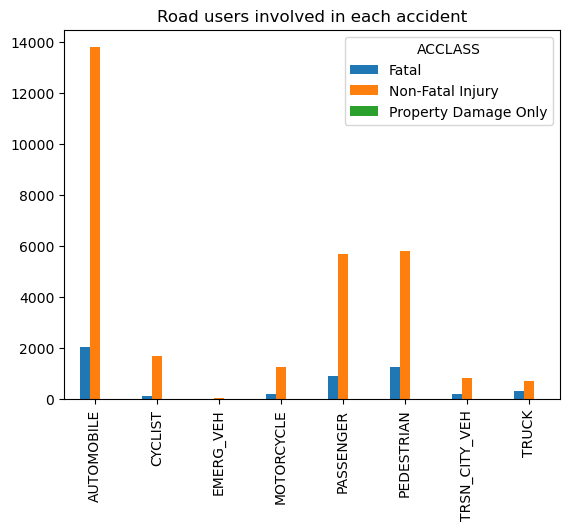

In [762]:
df_road_user[['Fatal','Non-Fatal Injury','Property Damage Only']].plot(kind='bar', title='Road users involved in each accident')